In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
imp_height, img_width = 32,32
batch_size = 20

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(

 "/content/drive/MyDrive/dataset/fruits dataset/fruits/train",
    image_size = (imp_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/fruits dataset/fruits/validation",
    image_size = (imp_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/fruits dataset/fruits/test",
    image_size = (imp_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


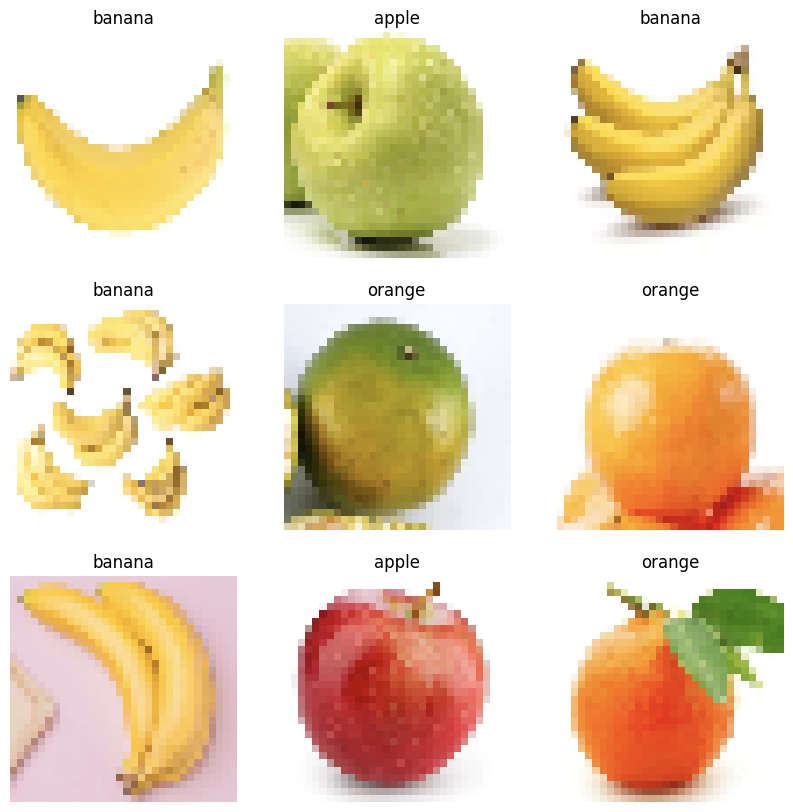

In [4]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [7]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 10s 238ms/step - loss: 0.9446 - accuracy: 0.6152 - val_loss: 0.6917 - val_accuracy: 0.5909
Epoch 2/10
23/23 [==============================] - 7s 206ms/step - loss: 0.5758 - accuracy: 0.7478 - val_loss: 0.5396 - val_accuracy: 0.7424
Epoch 3/10
23/23 [==============================] - 6s 187ms/step - loss: 0.3649 - accuracy: 0.8391 - val_loss: 0.3103 - val_accuracy: 0.8939
Epoch 4/10
23/23 [==============================] - 4s 119ms/step - loss: 0.2650 - accuracy: 0.9000 - val_loss: 0.3805 - val_accuracy: 0.8788
Epoch 5/10
23/23 [==============================] - 3s 88ms/step - loss: 0.2194 - accuracy: 0.9217 - val_loss: 0.2879 - val_accuracy: 0.8788
Epoch 6/10
23/23 [==============================] - 3s 119ms/step - loss: 0.1998 - accuracy: 0.9261 - val_loss: 0.2961 - val_accuracy: 0.9091
Epoch 7/10
23/23 [==============================] - 5s 158ms/step - loss: 0.1449 - accuracy: 0.9565 - val_loss: 0.3528 - val_accuracy: 0.9091
Epoch 

In [8]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 7ms/step - loss: 0.2217 - accuracy: 0.9462


[0.22174279391765594, 0.9461538195610046]

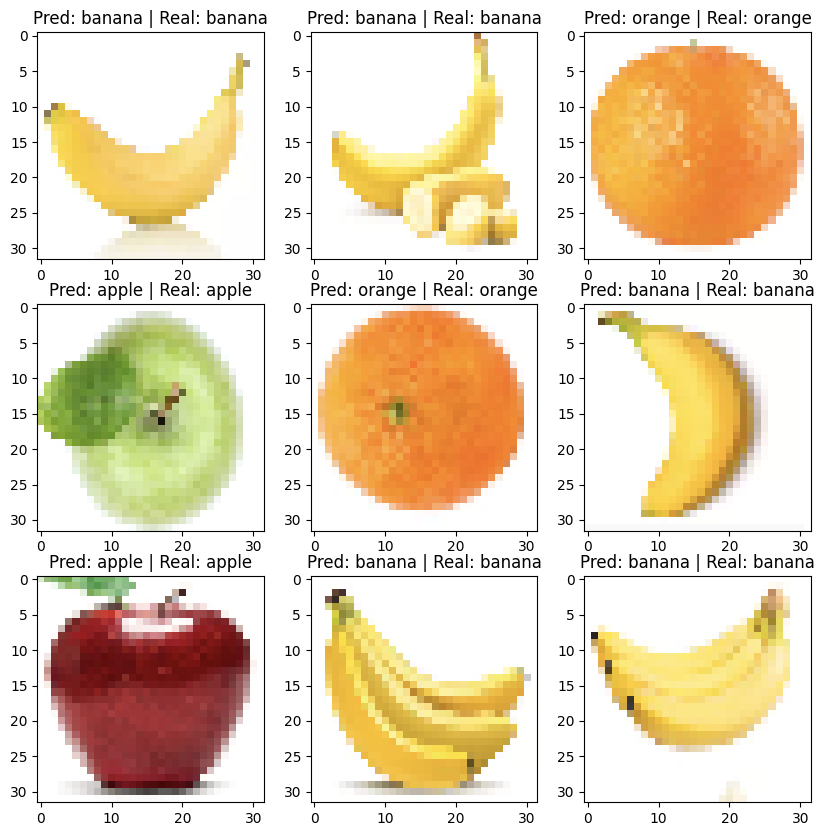

In [9]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)